In [ ]:
# Step 1: Install required packages
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import os
from ultralytics import YOLO

# Set up paths
data_yaml = "/content/drive/MyDrive/detecting blinking light/Car_front_side 3.v2i.yolov8 (2)/data.yaml"
output_dir = "/content/drive/MyDrive/detecting blinking light/training_results_2"
os.makedirs(output_dir, exist_ok=True)

# Load a pretrained YOLOv8 model
model = YOLO("yolov8s.pt")  # You can use yolov8s, yolov8m, etc. for larger models

# Custom training configuration
training_config = {
    "data": data_yaml,
    "epochs": 100,
    "imgsz": 640,
    "batch": 16,
    "optimizer": "auto",
    "lr0": 0.01,  # initial learning rate
    "lrf": 0.01,  # final learning rate (lr0 * lrf)
    "weight_decay": 0.0005,
    "patience": 20,  # epochs to wait for improvement before stopping
    "device": "0",  # use GPU if available
    "project": output_dir,
    "name": "car_lights_detection",
    "exist_ok": True,  # overwrite existing project/name
    "seed": 42,
    "deterministic": True,
    "single_cls": False,
    "rect": False,
    "cos_lr": False,
    "close_mosaic": 10,
    "resume": False,
    "amp": True,  # automatic mixed precision
    "fraction": 1.0,  # dataset fraction to train on
    "profile": False,
    "freeze": None,  # you can freeze some layers if needed
    "mask_ratio": 4,
    "dropout": 0.0,
    "val": True,  # validate during training
    "save_json": False,
    "save_hybrid": False,
    "conf": 0.25,  # object confidence threshold
    "iou": 0.7,  # NMS IoU threshold
    "max_det": 300,
    "half": False,
    "dnn": False,
    "plots": True,
    "augment": True,
    "fliplr": 0.0,  # Disable flipping augmentation
    "flipud": 0.0,  # Disable vertical flipping
    "mosaic": 1.0,  # Mosaic augmentation probability
    "mixup": 0.0,  # MixUp augmentation probability
    "copy_paste": 0.0,  # Copy-paste augmentation probability
    "erasing": 0.4,  # Random erasing probability
    "hsv_h": 0.015,  # image HSV-Hue augmentation (fraction)
    "hsv_s": 0.7,  # image HSV-Saturation augmentation (fraction)
    "hsv_v": 0.4,  # image HSV-Value augmentation (fraction)
    "degrees": 10.0,  # image rotation (+/- deg)
    "translate": 0.1,  # image translation (+/- fraction)
    "scale": 0.5,  # image scale (+/- gain)
    "shear": 2.0,  # image shear (+/- deg)
    "perspective": 0.0001,  # image perspective (+/- fraction), range 0-0.001
    "label_smoothing": 0.0,  # label smoothing epsilon
    "nbs": 64,  # nominal batch size
}

# Train the model
results = model.train(**training_config)

# Validate the model
metrics = model.val()
print(f"mAP50-95: {metrics.box.map}")  # mAP50-95
print(f"mAP50: {metrics.box.map50}")  # mAP50
print(f"mAP75: {metrics.box.map75}")  # mAP75

# Save the trained model
model_path = os.path.join(output_dir, "best_car_lights.pt")
model.export(format="onnx")  # optional: export to ONNX format
model.save(model_path)
print(f"Model saved to {model_path}")

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in in the future.
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.25, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/detecting blinking light/Car_front_side 3.v2i.yolov8 (2)/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=y

train: Scanning /content/drive/MyDrive/detecting blinking light/Car_front_side 3.v2i.yolov8 (2)/train/labels... 328 images, 10 backgrounds, 0 corrupt: 100%|██████████| 328/328 [02:31<00:00,  2.16it/s]

train: New cache created: /content/drive/MyDrive/detecting blinking light/Car_front_side 3.v2i.yolov8 (2)/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.0±0.0 MB/s, size: 6.3 KB)


val: Scanning /content/drive/MyDrive/detecting blinking light/Car_front_side 3.v2i.yolov8 (2)/valid/labels... 94 images, 1 backgrounds, 0 corrupt: 100%|██████████| 94/94 [01:17<00:00,  1.21it/s]

val: New cache created: /content/drive/MyDrive/detecting blinking light/Car_front_side 3.v2i.yolov8 (2)/valid/labels.cache


Plotting labels to /content/drive/MyDrive/detecting blinking light/training_results_2/car_lights_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/detecting blinking light/training_results_2/car_lights_detection
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.59G      1.999      4.084      2.032         49        640: 100%|██████████| 21/21 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]

                   all         94        314      0.414      0.303      0.344      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.97G      1.371      1.608      1.482         63        640: 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         94        314      0.518      0.583      0.536       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.01G      1.395      1.203      1.431         59        640: 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         94        314      0.681      0.662      0.748      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.05G      1.384      1.074       1.41         38        640: 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         94        314      0.705      0.672      0.733       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.08G      1.363      0.978      1.363         50        640: 100%|██████████| 21/21 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         94        314      0.786      0.744      0.804       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.12G      1.262     0.8755      1.322         47        640: 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         94        314      0.794       0.85      0.908      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.15G      1.247     0.8104      1.304         52        640: 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         94        314      0.753      0.647      0.712      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.19G      1.232     0.7716      1.299         54        640: 100%|██████████| 21/21 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         94        314      0.606       0.73      0.751      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.23G       1.25     0.7719      1.297         47        640: 100%|██████████| 21/21 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         94        314      0.886      0.815      0.893      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.26G      1.226     0.7413      1.294         48        640: 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         94        314      0.888      0.886      0.923      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       5.3G      1.209     0.7474      1.288         65        640: 100%|██████████| 21/21 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         94        314      0.896       0.88      0.923      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.34G      1.153     0.7198      1.262         46        640: 100%|██████████| 21/21 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         94        314      0.925      0.842      0.882      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.37G      1.178      0.709      1.261         51        640: 100%|██████████| 21/21 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         94        314      0.917      0.889      0.931       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.41G      1.171     0.6889      1.259         56        640: 100%|██████████| 21/21 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all         94        314      0.922      0.931      0.958      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.45G      1.168     0.6671       1.26         46        640: 100%|██████████| 21/21 [00:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         94        314      0.891      0.901      0.915       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.48G      1.113     0.6572      1.239         45        640: 100%|██████████| 21/21 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         94        314      0.913       0.92       0.94      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.52G      1.107     0.6351      1.218         59        640: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         94        314      0.923       0.94      0.943      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.55G      1.127     0.6313      1.238         47        640: 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         94        314      0.952       0.91      0.955       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.59G      1.111     0.6262      1.241         50        640: 100%|██████████| 21/21 [00:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         94        314      0.904      0.914      0.921      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.63G       1.12      0.616      1.231         57        640: 100%|██████████| 21/21 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         94        314      0.928      0.934      0.957      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.66G      1.071     0.6022      1.178         60        640: 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         94        314      0.898       0.96      0.958      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.7G      1.059     0.5949      1.201         60        640: 100%|██████████| 21/21 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         94        314      0.934      0.922      0.942       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.73G      1.038     0.5812      1.182         34        640: 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         94        314      0.921      0.912      0.929      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.77G      1.039      0.581      1.197         60        640: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         94        314      0.915      0.915      0.942      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.81G      1.041     0.5763      1.205         52        640: 100%|██████████| 21/21 [00:06<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         94        314      0.888      0.913      0.921      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.84G      1.009     0.5562      1.164         53        640: 100%|██████████| 21/21 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         94        314      0.947      0.931      0.962      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.88G      1.022     0.5608      1.181         51        640: 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         94        314      0.937      0.934      0.958      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.92G     0.9796     0.5638      1.141         63        640: 100%|██████████| 21/21 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         94        314      0.907      0.954      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.95G      1.013     0.5522      1.173         50        640: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         94        314      0.932      0.941      0.948      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.99G     0.9967     0.5508      1.175         72        640: 100%|██████████| 21/21 [00:07<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         94        314      0.957      0.956      0.966      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.03G      1.003     0.5492      1.171         44        640: 100%|██████████| 21/21 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         94        314      0.935      0.958      0.966      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.06G     0.9694     0.5308      1.153         33        640: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         94        314      0.941      0.908      0.938       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       6.1G       0.96     0.5203      1.142         66        640: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

                   all         94        314      0.939      0.937      0.953      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.13G      0.959     0.5152      1.132         54        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         94        314      0.952      0.934      0.949      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.17G     0.9389     0.5064      1.128         39        640: 100%|██████████| 21/21 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         94        314      0.954      0.909      0.939      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.21G     0.9472     0.5061      1.135         50        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         94        314      0.957      0.922      0.953      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.24G     0.9243     0.5016       1.13         63        640: 100%|██████████| 21/21 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         94        314      0.944      0.925      0.937      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.28G     0.9287     0.5151      1.133         53        640: 100%|██████████| 21/21 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         94        314      0.975      0.899      0.943       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.32G     0.9324     0.4998      1.125         48        640: 100%|██████████| 21/21 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         94        314      0.945      0.972      0.967      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.35G     0.9189     0.4844      1.124         51        640: 100%|██████████| 21/21 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         94        314      0.942      0.961      0.973      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.39G     0.9208     0.4948      1.111         67        640: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         94        314      0.972      0.948      0.963      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.43G     0.9386     0.5203      1.128         56        640: 100%|██████████| 21/21 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         94        314      0.941      0.933      0.953      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.46G      0.919     0.4958       1.11         46        640: 100%|██████████| 21/21 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         94        314      0.939       0.92      0.944      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       6.5G     0.9368     0.4963       1.13         53        640: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         94        314      0.968       0.91      0.944       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.54G     0.8954     0.4832      1.117         43        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         94        314      0.945      0.937      0.955      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.57G     0.8662     0.4625      1.079         59        640: 100%|██████████| 21/21 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         94        314      0.971      0.942      0.963      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.61G     0.8648     0.4791      1.097         45        640: 100%|██████████| 21/21 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         94        314       0.95      0.949      0.959      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.64G      0.841     0.4626      1.091         47        640: 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         94        314      0.963      0.926      0.956      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.68G      0.867     0.4554       1.08         64        640: 100%|██████████| 21/21 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         94        314      0.963      0.928      0.954      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.72G     0.8363     0.4425      1.069         69        640: 100%|██████████| 21/21 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         94        314      0.966      0.931      0.959      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.75G     0.8458     0.4457      1.078         42        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         94        314      0.965      0.916      0.944      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.79G     0.8332     0.4353      1.071         55        640: 100%|██████████| 21/21 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         94        314      0.958      0.937      0.957      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.82G     0.8191     0.4372      1.055         56        640: 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

                   all         94        314       0.97      0.948      0.977      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.86G     0.8176     0.4446      1.077         34        640: 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         94        314      0.951      0.948      0.971      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.93G     0.8294      0.436      1.077         56        640: 100%|██████████| 21/21 [00:08<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         94        314      0.952      0.952      0.961      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.97G     0.8369     0.4491      1.072         49        640: 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all         94        314      0.973      0.935      0.956      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.04G     0.8193     0.4434      1.067         54        640: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         94        314      0.956      0.932      0.961      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.13G     0.7905      0.431      1.059         63        640: 100%|██████████| 21/21 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         94        314      0.953      0.939       0.96      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.17G     0.7995     0.4246      1.065         47        640: 100%|██████████| 21/21 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         94        314      0.945      0.919       0.95      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.24G     0.7807     0.4237      1.035         59        640: 100%|██████████| 21/21 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         94        314      0.898      0.969      0.961       0.65
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 40, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



60 epochs completed in 0.165 hours.
Optimizer stripped from /content/drive/MyDrive/detecting blinking light/training_results_2/car_lights_detection/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/detecting blinking light/training_results_2/car_lights_detection/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/detecting blinking light/training_results_2/car_lights_detection/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


                   all         94        314      0.699      0.929      0.843      0.579
            front_side         92         93      0.989      0.976      0.993        0.8
                  left         91         91      0.489      0.978      0.661      0.428
                 right         92         92       0.52          1      0.856      0.596
           turn_signal         38         38      0.797      0.763      0.864      0.492
Speed: 0.2ms preprocess, 20.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/drive/MyDrive/detecting blinking light/training_results_2/car_lights_detection
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 5.0±6.3 MB/s, size: 6.6 KB)


val: Scanning /content/drive/MyDrive/detecting blinking light/Car_front_side 3.v2i.yolov8 (2)/valid/labels.cache... 94 images, 1 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all         94        314      0.703      0.923      0.847      0.586
            front_side         92         93      0.989      0.985      0.993      0.802
                  left         91         91      0.494      0.978      0.675      0.444
                 right         92         92      0.526      0.989       0.85      0.595
           turn_signal         38         38      0.801      0.741      0.871      0.504
Speed: 0.2ms preprocess, 32.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/detecting blinking light/training_results_2/car_lights_detection
mAP50-95: 0.5860940747692645
mAP50: 0.8474010075233596
mAP75: 0.7178763653640751
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/drive/MyDrive/detecting blinking l

In [ ]:
# Annotate only bounding boxes of turn signals
from ultralytics import YOLO
import cv2
import numpy as np

# Load models (replace with your actual model paths)
car_detector = YOLO("yolov8s.pt")  # Stage 1: General vehicle detection
custom_model = YOLO("/content/drive/MyDrive/detecting blinking light/training_results_2/best_car_lights.pt")  # Stage 2: Your trained 4-class model

input_video_path = "/content/drive/MyDrive/IU of Applied Sciences - Master of Artificial Intelligence/Master Thesis with Mushyam, Aditya, Dr./CODES and archive/Speed Estimation Project/Data/IMG_3575.mov"
output_video_path = "/content/drive/MyDrive/detecting blinking light/processed_output.mp4"

# Initialize video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(3)), int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Define colors for turn signal only
turn_signal_color = (0, 165, 255)  # Orange for turn signal

# Updated class names with 4 classes
class_names = ['front_side', 'left', 'right', 'turn_signal']

# Tracking history
track_history = {}

# Adjustable threshold for turn signal (you can change this value)
TURN_SIGNAL_THRESHOLD = 0.5  # Default value, you can adjust this higher

# Process video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    annotated_frame = frame.copy()

    # STAGE 1: Vehicle Detection and Tracking
    car_results = car_detector.track(
        frame,
        persist=True,
        classes=[2, 5, 7],  # COCO classes: car, bus, truck
        conf=0.5,
        iou=0.5,
        show=False
    )

    if car_results[0].boxes.id is not None:
        boxes = car_results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = car_results[0].boxes.id.cpu().numpy().astype(int)

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box
            vehicle_crop = frame[y1:y2, x1:x2]

            # Initialize new track if needed
            if track_id not in track_history:
                track_history[track_id] = {
                    'vehicle_color': np.random.randint(0, 255, 3).tolist(),
                    'detections': []
                }

            # Draw vehicle bounding box (optional, you can remove this if you don't want vehicle boxes)
            # cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # cv2.putText(annotated_frame, f"Vehicle {track_id}", (x1, y1 - 10),
            #            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # STAGE 2: Custom 4-class detection within vehicle
            custom_results = custom_model(vehicle_crop)

            for r in custom_results:
                boxes = r.boxes.xyxy.cpu().numpy().astype(int)
                conf = r.boxes.conf.cpu().numpy()
                cls = r.boxes.cls.cpu().numpy()

                for box, c, cl in zip(boxes, conf, cls):
                    class_name = class_names[int(cl)]

                    # Only process turn signals that meet the threshold
                    if class_name == 'turn_signal' and c >= TURN_SIGNAL_THRESHOLD:
                        fx1, fy1, fx2, fy2 = box

                        # Absolute coordinates on original frame
                        abs_fx1 = x1 + fx1
                        abs_fy1 = y1 + fy1
                        abs_fx2 = x1 + fx2
                        abs_fy2 = y1 + fy2

                        label = f"{class_name} {c:.2f}"

                        # Draw bounding box and label only for turn signals
                        cv2.rectangle(annotated_frame,
                                     (abs_fx1, abs_fy1),
                                     (abs_fx2, abs_fy2),
                                     turn_signal_color, 2)
                        cv2.putText(annotated_frame, label,
                                   (abs_fx1, abs_fy1 - 10),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, turn_signal_color, 1)

                        # Store detection history
                        track_history[track_id]['detections'].append({
                            'frame': frame_count,
                            'class': class_name,
                            'box': [abs_fx1, abs_fy1, abs_fx2, abs_fy2],
                            'conf': c
                        })

    # Write frame to output
    out.write(annotated_frame)

    # Display progress
    if frame_count % 10 == 0:
        print(f"Processed frame {frame_count}")

# Release resources
cap.release()
out.release()
print(f"Processing complete. Output saved to {output_video_path}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 314MB/s]


Streaming output truncated to the last 5000 lines.
0: 480x640 1 front_side, 1 left, 1 right, 1 turn_signal, 10.0ms
Speed: 2.3ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 608x640 1 front_side, 1 left, 1 right, 10.8ms
Speed: 3.8ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)

0: 320x640 1 front_side, 1 left, 1 right, 1 turn_signal, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 640)

0: 640x544 1 left, 17.2ms
Speed: 2.9ms preprocess, 17.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 544)

0: 512x640 1 front_side, 1 left, 1 right, 15.4ms
Speed: 2.8ms preprocess, 15.4ms inference, 6.4ms postprocess per image at shape (1, 3, 512, 640)

0: 576x640 1 front_side, 1 left, 1 right, 15.4ms
Speed: 2.9ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 640)

0: 608x640 1 front_side, 1 left, 1 right, 1 turn_signal, 10.

In [ ]:
# cars toucing right side line
# if they do not have 2-3 times of consistent blinking, then it is not blinking and needs to be

In [ ]:
# collect car and its

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load models
car_detector = YOLO("yolov8s.pt")
custom_model = YOLO("/content/drive/MyDrive/detecting blinking light/training_results_2/best_car_lights.pt")

# Video paths
input_video_path = "/content/drive/MyDrive/IU of Applied Sciences - Master of Artificial Intelligence/Master Thesis with Mushyam, Aditya, Dr./CODES and archive/Speed Estimation Project/Data/IMG_3575.mov"
output_video_path = "/content/drive/MyDrive/detecting blinking light/processed_output_zone.mp4"

# Initialize video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(3)), int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Define polygon points (in order) as float32
# polygon_points = np.array([
#     [565, 200],
#     [670, 337],
#     [878, 283],
#     [953, 122],
#     [1037, 45],
#     [886, 31],
#     [723, 102]
# ], dtype=np.float32)

polygon_points = np.array([
    [513, 200],
    [517, 350],
    [670, 337],
    [878, 283],
    [953, 122],
    [1037, 45],
    [858, 31],
    [670, 102]
], dtype=np.float32)

    # [513, 200],
    # [517, 350],
    # [670, 337],
    # [878, 283],
    # [953, 122],
    # [1037, 45],
    # [858, 31],
    # [670, 102]

# Define colors
colors = {
    'vehicle': (0, 255, 0),
    'front_side': (255, 0, 0),
    'left': (0, 255, 255),
    'right': (255, 0, 255),
    'turn_signal': (0, 165, 255),
    'zone': (255, 255, 0)  # Yellow for zone
}

# Class names and thresholds
class_names = ['front_side', 'left', 'right', 'turn_signal']
class_thresholds = {
    'front_side': 0.3,
    'left': 0.4,
    'right': 0.4,
    'turn_signal': 0.5
}

# Tracking history
track_history = {}

# Process video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    annotated_frame = frame.copy()

    # Draw the polygon zone (semi-transparent)
    overlay = annotated_frame.copy()
    cv2.fillPoly(overlay, [polygon_points.astype(int)], colors['zone'] + (50,))
    cv2.addWeighted(overlay, 0.3, annotated_frame, 0.7, 0, annotated_frame)
    cv2.polylines(annotated_frame, [polygon_points.astype(int)], True, colors['zone'], 2)

    # Vehicle detection
    car_results = car_detector.track(
        frame,
        persist=True,
        classes=[2, 5, 7],
        conf=0.5,
        iou=0.5,
        show=False
    )

    if car_results[0].boxes.id is not None:
        boxes = car_results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = car_results[0].boxes.id.cpu().numpy().astype(int)

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box

            # Check if car is in or touching the zone
            car_center = (float((x1 + x2) // 2), float((y1 + y2) // 2))
            car_rect = np.array([
                [x1, y1], [x2, y1],
                [x2, y2], [x1, y2]
            ], dtype=np.float32)

            # Check if center is in polygon
            in_zone = cv2.pointPolygonTest(polygon_points, car_center, False) >= 0

            # If center not in zone, check if any corner is in zone
            if not in_zone:
                for point in car_rect:
                    if cv2.pointPolygonTest(polygon_points, tuple(point), False) >= 0:
                        in_zone = True
                        break

            # If still not in zone, check if any polygon point is inside car bbox
            if not in_zone:
                for point in polygon_points:
                    if (x1 <= point[0] <= x2) and (y1 <= point[1] <= y2):
                        in_zone = True
                        break

            if not in_zone:
                continue  # Skip cars outside the zone

            vehicle_crop = frame[y1:y2, x1:x2]

            # Initialize track if needed
            if track_id not in track_history:
                track_history[track_id] = {
                    'vehicle_color': np.random.randint(0, 255, 3).tolist(),
                    'left_light_status': [],
                    'right_light_status': [],
                    'current_left_light': None,
                    'current_right_light': None,
                    'current_turn_signals': []
                }

            # Draw vehicle bounding box
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), colors['vehicle'], 2)
            cv2.putText(annotated_frame, f"Vehicle {track_id}", (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors['vehicle'], 2)

            # Reset current detections
            track_history[track_id]['current_left_light'] = None
            track_history[track_id]['current_right_light'] = None
            track_history[track_id]['current_turn_signals'] = []

            # Custom detection
            custom_results = custom_model(vehicle_crop)
            for r in custom_results:
                boxes = r.boxes.xyxy.cpu().numpy().astype(int)
                conf = r.boxes.conf.cpu().numpy()
                cls = r.boxes.cls.cpu().numpy()

                for box, c, cl in zip(boxes, conf, cls):
                    class_name = class_names[int(cl)]
                    if c < class_thresholds[class_name]:
                        continue

                    fx1, fy1, fx2, fy2 = box
                    abs_fx1 = x1 + fx1
                    abs_fy1 = y1 + fy1
                    abs_fx2 = x1 + fx2
                    abs_fy2 = y1 + fy2

                    color = colors[class_name]
                    label = f"{class_name} {c:.2f}"

                    cv2.rectangle(annotated_frame,
                                (abs_fx1, abs_fy1),
                                (abs_fx2, abs_fy2),
                                color, 2)
                    cv2.putText(annotated_frame, label,
                              (abs_fx1, abs_fy1 - 10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

                    detection = {
                        'class': class_name,
                        'box': [abs_fx1, abs_fy1, abs_fx2, abs_fy2],
                        'conf': c
                    }

                    if class_name == 'left':
                        track_history[track_id]['current_left_light'] = detection
                    elif class_name == 'right':
                        track_history[track_id]['current_right_light'] = detection
                    elif class_name == 'turn_signal':
                        track_history[track_id]['current_turn_signals'].append(detection)

            # Check turn signals in lights
            left_status = 0
            right_status = 0

            current_left = track_history[track_id]['current_left_light']
            current_right = track_history[track_id]['current_right_light']
            current_signals = track_history[track_id]['current_turn_signals']

            if current_left and current_signals:
                left_box = current_left['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= left_box[0] and signal_box[2] <= left_box[2] and
                        signal_box[1] >= left_box[1] and signal_box[3] <= left_box[3]):
                        left_status = 1
                        break

            if current_right and current_signals:
                right_box = current_right['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= right_box[0] and signal_box[2] <= right_box[2] and
                        signal_box[1] >= right_box[1] and signal_box[3] <= right_box[3]):
                        right_status = 1
                        break

            track_history[track_id]['left_light_status'].append(left_status)
            track_history[track_id]['right_light_status'].append(right_status)

    # Write frame
    out.write(annotated_frame)

    if frame_count % 10 == 0:
        print(f"Processed frame {frame_count}")

cap.release()
out.release()

# Print results
print("\nCollected light status data (only for cars in zone):")
for track_id, data in track_history.items():
    print(f"car_{track_id}{{")
    print(f"  left_light: {data['left_light_status']},")
    print(f"  right_light: {data['right_light_status']}")
    print("}")

print(f"\nProcessing complete. Output saved to {output_video_path}")

Streaming output truncated to the last 5000 lines.
0: 480x640 1 front_side, 1 left, 1 right, 2 turn_signals, 14.2ms
Speed: 2.7ms preprocess, 14.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 11 cars, 27.4ms
Speed: 7.7ms preprocess, 27.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 352x640 1 front_side, 1 left, 2 rights, 12.8ms
Speed: 2.3ms preprocess, 12.8ms inference, 2.4ms postprocess per image at shape (1, 3, 352, 640)

0: 576x640 1 front_side, 1 left, 1 right, 16.7ms
Speed: 3.2ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)

0: 544x640 1 front_side, 1 left, 1 right, 16.7ms
Speed: 2.7ms preprocess, 16.7ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)
Processed frame 540

0: 384x640 10 cars, 1 truck, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 352x640 1 front_side, 1 left, 1 right, 1 turn_signal, 12.0ms
S

In [ ]:
car_data = track_history[8]

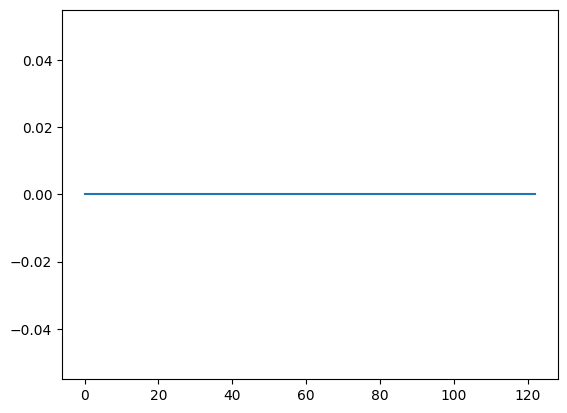

In [ ]:
import matplotlib.pyplot as plt

plt.plot(car_data['left_light_status'])

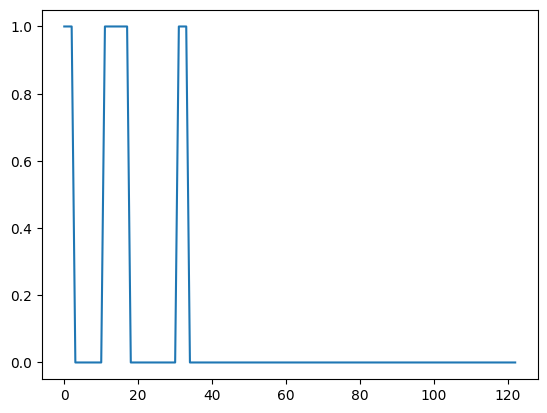

In [ ]:
plt.plot(car_data['right_light_status'])

In [ ]:
import pickle

# After processing all frames, save the track_history data
output_path = "/content/drive/MyDrive/detecting blinking light/car_data.pkl"

with open(output_path, 'wb') as f:
    pickle.dump(track_history, f)

print(f"Car data saved to {output_path}")

Car data saved to /content/drive/MyDrive/detecting blinking light/car_data.pkl


In [ ]:
import pickle

# Path to your pickle file
file_path = "/content/drive/MyDrive/detecting blinking light/car_data.pkl"

# Load the data
with open(file_path, 'rb') as f:
    car_data = pickle.load(f)

# Now you can work with the car_data dictionary
print("Loaded car data for", len(car_data), "vehicles")
for car_id, data in car_data.items():
    print(f"\nCar {car_id}:")
    print("Left light status:", data['left_light_status'])
    print("Right light status:", data['right_light_status'])

Loaded car data for 46 vehicles

Car 5:
Left light status: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Right light status: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# Result 1

# draws car bounding boxes red and green. Once turned green it keeps it green, with polygone zone

from ultralytics import YOLO
import cv2
import numpy as np

# Load models
car_detector = YOLO("yolov8s.pt")
custom_model = YOLO("/content/drive/MyDrive/detecting blinking light/training_results_2/best_car_lights.pt")

# Video paths
input_video_path = "/content/drive/MyDrive/IU of Applied Sciences - Master of Artificial Intelligence/Master Thesis with Mushyam, Aditya, Dr./CODES and archive/Speed Estimation Project/Data/IMG_3575.mov"
output_video_path = "/content/drive/MyDrive/detecting blinking light/processed_output_zone.mp4"

# Initialize video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(3)), int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Define polygon points (in order) as float32
polygon_points = np.array([
    [513, 200],
    [517, 350],
    [670, 337],
    [878, 283],
    [953, 122],
    [1037, 45],
    [858, 31],
    [670, 102]
], dtype=np.float32)

# Define colors
colors = {
    'vehicle': (0, 255, 0),        # Green for vehicles
    'front_side': (255, 0, 0),     # Blue for front/side
    'left': (0, 255, 255),         # Yellow for left
    'right': (255, 0, 255),        # Magenta for right
    'turn_signal': (0, 165, 255),  # Orange for turn signal
    'zone': (255, 255, 0),         # Yellow for zone
    'blinking': (0, 255, 0),       # Green for blinking (legal)
    'not_blinking': (0, 0, 255)    # Red for not blinking (violation)
}

# Class names and thresholds
class_names = ['front_side', 'left', 'right', 'turn_signal']
class_thresholds = {
    'front_side': 0.3,
    'left': 0.4,
    'right': 0.4,
    'turn_signal': 0.5
}

# Tracking history
track_history = {}

def simplify_signal(signal):
    """Remove consecutive duplicates from a signal."""
    if not signal:
        return []

    simplified = [signal[0]]
    for num in signal[1:]:
        if num != simplified[-1]:
            simplified.append(num)
    return simplified

def is_blinking(simplified_signal):
    """Check if simplified signal follows a blinking pattern."""
    # Need at least 4 elements to confirm blinking pattern
    if len(simplified_signal) < 4:
        return False

    # Check for alternating pattern starting with 0 or 1
    pattern1 = [0, 1] * (len(simplified_signal) // 2)
    pattern2 = [1, 0] * (len(simplified_signal) // 2)

    # Handle odd lengths by truncating patterns
    pattern1 = pattern1[:len(simplified_signal)]
    pattern2 = pattern2[:len(simplified_signal)]

    return simplified_signal == pattern1 or simplified_signal == pattern2

# Process video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    annotated_frame = frame.copy()

    # Draw the polygon zone (semi-transparent)
    overlay = annotated_frame.copy()
    cv2.fillPoly(overlay, [polygon_points.astype(int)], colors['zone'] + (50,))
    cv2.addWeighted(overlay, 0.3, annotated_frame, 0.7, 0, annotated_frame)
    cv2.polylines(annotated_frame, [polygon_points.astype(int)], True, colors['zone'], 2)

    # Vehicle detection
    car_results = car_detector.track(
        frame,
        persist=True,
        classes=[2, 5, 7],
        conf=0.5,
        iou=0.5,
        show=False
    )

    if car_results[0].boxes.id is not None:
        boxes = car_results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = car_results[0].boxes.id.cpu().numpy().astype(int)

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box

            # Check if car is in or touching the zone
            car_center = (float((x1 + x2) // 2), float((y1 + y2) // 2))
            car_rect = np.array([
                [x1, y1], [x2, y1],
                [x2, y2], [x1, y2]
            ], dtype=np.float32)

            # Check if center is in polygon
            in_zone = cv2.pointPolygonTest(polygon_points, car_center, False) >= 0

            # If center not in zone, check if any corner is in zone
            if not in_zone:
                for point in car_rect:
                    if cv2.pointPolygonTest(polygon_points, tuple(point), False) >= 0:
                        in_zone = True
                        break

            # If still not in zone, check if any polygon point is inside car bbox
            if not in_zone:
                for point in polygon_points:
                    if (x1 <= point[0] <= x2) and (y1 <= point[1] <= y2):
                        in_zone = True
                        break

            if not in_zone:
                continue  # Skip cars outside the zone

            vehicle_crop = frame[y1:y2, x1:x2]

            # Initialize track if needed
            if track_id not in track_history:
                track_history[track_id] = {
                    'vehicle_color': np.random.randint(0, 255, 3).tolist(),
                    'left_light_status': [],
                    'right_light_status': [],
                    'current_left_light': None,
                    'current_right_light': None,
                    'current_turn_signals': [],
                    'blinking_confirmed': False  # New flag to track confirmed blinking
                }

            # Reset current detections
            track_history[track_id]['current_left_light'] = None
            track_history[track_id]['current_right_light'] = None
            track_history[track_id]['current_turn_signals'] = []

            # Custom detection
            custom_results = custom_model(vehicle_crop)
            for r in custom_results:
                boxes = r.boxes.xyxy.cpu().numpy().astype(int)
                conf = r.boxes.conf.cpu().numpy()
                cls = r.boxes.cls.cpu().numpy()

                for box, c, cl in zip(boxes, conf, cls):
                    class_name = class_names[int(cl)]
                    if c < class_thresholds[class_name]:
                        continue

                    fx1, fy1, fx2, fy2 = box
                    abs_fx1 = x1 + fx1
                    abs_fy1 = y1 + fy1
                    abs_fx2 = x1 + fx2
                    abs_fy2 = y1 + fy2

                    color = colors[class_name]
                    label = f"{class_name} {c:.2f}"

                    cv2.rectangle(annotated_frame,
                                (abs_fx1, abs_fy1),
                                (abs_fx2, abs_fy2),
                                color, 2)
                    cv2.putText(annotated_frame, label,
                              (abs_fx1, abs_fy1 - 10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

                    detection = {
                        'class': class_name,
                        'box': [abs_fx1, abs_fy1, abs_fx2, abs_fy2],
                        'conf': c
                    }

                    if class_name == 'left':
                        track_history[track_id]['current_left_light'] = detection
                    elif class_name == 'right':
                        track_history[track_id]['current_right_light'] = detection
                    elif class_name == 'turn_signal':
                        track_history[track_id]['current_turn_signals'].append(detection)

            # Check turn signals in lights
            left_status = 0
            right_status = 0

            current_left = track_history[track_id]['current_left_light']
            current_right = track_history[track_id]['current_right_light']
            current_signals = track_history[track_id]['current_turn_signals']

            if current_left and current_signals:
                left_box = current_left['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= left_box[0] and signal_box[2] <= left_box[2] and
                        signal_box[1] >= left_box[1] and signal_box[3] <= left_box[3]):
                        left_status = 1
                        break

            if current_right and current_signals:
                right_box = current_right['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= right_box[0] and signal_box[2] <= right_box[2] and
                        signal_box[1] >= right_box[1] and signal_box[3] <= right_box[3]):
                        right_status = 1
                        break

            track_history[track_id]['left_light_status'].append(left_status)
            track_history[track_id]['right_light_status'].append(right_status)

            # Check blinking status (only if not already confirmed)
            if not track_history[track_id]['blinking_confirmed']:
                simplified_right = simplify_signal(track_history[track_id]['right_light_status'])
                right_blinking = is_blinking(simplified_right)
                if right_blinking:
                    track_history[track_id]['blinking_confirmed'] = True

            # Choose box color based on blinking status
            box_color = colors['blinking'] if track_history[track_id]['blinking_confirmed'] else colors['not_blinking']

            # Draw vehicle bounding box with blinking status color
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), box_color, 2)
            status_text = "Blinking" if track_history[track_id]['blinking_confirmed'] else "Not blinking"
            cv2.putText(annotated_frame, f"Vehicle {track_id} ({status_text})", (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 2)

    # Write frame
    out.write(annotated_frame)

    if frame_count % 10 == 0:
        print(f"Processed frame {frame_count}")

cap.release()
out.release()

Streaming output truncated to the last 5000 lines.

0: 544x640 1 front_side, 1 left, 1 right, 16.6ms
Speed: 2.3ms preprocess, 16.6ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 384x640 13 cars, 10.9ms
Speed: 5.0ms preprocess, 10.9ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 576x640 1 front_side, 1 left, 1 right, 1 turn_signal, 16.8ms
Speed: 4.2ms preprocess, 16.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 640)

0: 384x640 1 front_side, 1 left, 1 right, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 544x640 1 front_side, 1 left, 1 right, 16.8ms
Speed: 2.7ms preprocess, 16.8ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 384x640 12 cars, 10.9ms
Speed: 4.6ms preprocess, 10.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 608x640 1 front_side, 1 left, 1 right, 17.7ms
Speed: 3.6ms preprocess, 17.7ms inference, 2.0

In [ ]:
# just keep violators and non violators

# Draw two lanes. If one car moves from Lane 2 to lane 1 and no right blinking light is turned on put on it violator sign

### Annotate all cars, use only 20 sec of the video, left turn and right turn are detected

In [ ]:
# Result 2
from ultralytics import YOLO
import cv2
import numpy as np

# Load models
car_detector = YOLO("yolov8s.pt")
custom_model = YOLO("/content/drive/MyDrive/detecting blinking light/training_results_2/best_car_lights.pt")

# Video paths
input_video_path = "/content/drive/MyDrive/IU of Applied Sciences - Master of Artificial Intelligence/Master Thesis with Mushyam, Aditya, Dr./CODES and archive/Speed Estimation Project/Data/IMG_3575.mov"
output_video_path = "/content/drive/MyDrive/detecting blinking light/processed_output_modified.mp4"

# Initialize video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(3)), int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Color definitions
COLORS = {
    'gray': (128, 128, 128),
    'green': (0, 255, 0),
    'purple': (128, 0, 128),
    'yellow': (0, 255, 255)
}

# Class names and thresholds
class_names = ['front_side', 'left', 'right', 'turn_signal']
class_thresholds = {
    'front_side': 0.3,
    'left': 0.4,
    'right': 0.4,
    'turn_signal': 0.5
}

# Tracking history
track_history = {}

def simplify_signal(signal):
    """Remove consecutive duplicates from a signal."""
    if not signal:
        return []

    simplified = [signal[0]]
    for num in signal[1:]:
        if num != simplified[-1]:
            simplified.append(num)
    return simplified

def is_blinking(simplified_signal):
    """Check if simplified signal follows a blinking pattern."""
    if len(simplified_signal) < 4:
        return False

    pattern1 = [0, 1] * (len(simplified_signal) // 2)
    pattern2 = [1, 0] * (len(simplified_signal) // 2)
    pattern1 = pattern1[:len(simplified_signal)]
    pattern2 = pattern2[:len(simplified_signal)]

    return simplified_signal == pattern1 or simplified_signal == pattern2

# Process video
frame_count = 0
max_frames = fps * 20  # Process only 20 seconds

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    annotated_frame = frame.copy()

    # Vehicle detection
    car_results = car_detector.track(
        frame,
        persist=True,
        classes=[2, 5, 7],
        conf=0.5,
        iou=0.5,
        show=False
    )

    if car_results[0].boxes.id is not None:
        boxes = car_results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = car_results[0].boxes.id.cpu().numpy().astype(int)

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box

            # Initialize track if needed
            if track_id not in track_history:
                track_history[track_id] = {
                    'left_light_status': [],
                    'right_light_status': [],
                    'left_confirmed': False,
                    'right_confirmed': False,
                    'current_left_light': None,
                    'current_right_light': None,
                    'current_turn_signals': []
                }

            # Reset current detections
            track_history[track_id]['current_left_light'] = None
            track_history[track_id]['current_right_light'] = None
            track_history[track_id]['current_turn_signals'] = []

            # Custom detection on vehicle crop
            vehicle_crop = frame[y1:y2, x1:x2]
            custom_results = custom_model(vehicle_crop)

            for r in custom_results:
                boxes = r.boxes.xyxy.cpu().numpy().astype(int)
                conf = r.boxes.conf.cpu().numpy()
                cls = r.boxes.cls.cpu().numpy()

                for box, c, cl in zip(boxes, conf, cls):
                    class_name = class_names[int(cl)]
                    if c < class_thresholds[class_name]:
                        continue

                    fx1, fy1, fx2, fy2 = box
                    detection = {
                        'class': class_name,
                        'box': [x1 + fx1, y1 + fy1, x1 + fx2, y1 + fy2],
                        'conf': c
                    }

                    if class_name == 'left':
                        track_history[track_id]['current_left_light'] = detection
                    elif class_name == 'right':
                        track_history[track_id]['current_right_light'] = detection
                    elif class_name == 'turn_signal':
                        track_history[track_id]['current_turn_signals'].append(detection)

            # Check turn signals in lights
            left_status = 0
            right_status = 0

            current_left = track_history[track_id]['current_left_light']
            current_right = track_history[track_id]['current_right_light']
            current_signals = track_history[track_id]['current_turn_signals']

            # Check left light
            if current_left and current_signals:
                left_box = current_left['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= left_box[0] and signal_box[2] <= left_box[2] and
                        signal_box[1] >= left_box[1] and signal_box[3] <= left_box[3]):
                        left_status = 1
                        break

            # Check right light
            if current_right and current_signals:
                right_box = current_right['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= right_box[0] and signal_box[2] <= right_box[2] and
                        signal_box[1] >= right_box[1] and signal_box[3] <= right_box[3]):
                        right_status = 1
                        break

            # Update status history
            track_history[track_id]['left_light_status'].append(left_status)
            track_history[track_id]['right_light_status'].append(right_status)

            # Check for blinking patterns if not already confirmed
            if not track_history[track_id]['left_confirmed']:
                simplified_left = simplify_signal(track_history[track_id]['left_light_status'])
                if is_blinking(simplified_left):
                    track_history[track_id]['left_confirmed'] = True

            if not track_history[track_id]['right_confirmed']:
                simplified_right = simplify_signal(track_history[track_id]['right_light_status'])
                if is_blinking(simplified_right):
                    track_history[track_id]['right_confirmed'] = True

            # Determine box color
            if track_history[track_id]['left_confirmed'] and track_history[track_id]['right_confirmed']:
                color = COLORS['yellow']
            elif track_history[track_id]['left_confirmed']:
                color = COLORS['purple']
            elif track_history[track_id]['right_confirmed']:
                color = COLORS['green']
            else:
                color = COLORS['gray']

            # Draw vehicle bounding box
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), color, 2)

            # Display status text
            status_text = []
            if track_history[track_id]['left_confirmed']:
                status_text.append("L-Blink")
            if track_history[track_id]['right_confirmed']:
                status_text.append("R-Blink")
            if not status_text:
                status_text.append("No-Blink")

            cv2.putText(annotated_frame, f"ID:{track_id} {'+'.join(status_text)}",
                        (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write frame
    out.write(annotated_frame)

    if frame_count % 10 == 0:
        print(f"Processed frame {frame_count}/{max_frames}")

cap.release()
out.release()
print("Processing completed!")

Streaming output truncated to the last 5000 lines.

0: 608x640 1 front_side, 1 left, 1 right, 15.9ms
Speed: 3.2ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)

0: 320x640 1 front_side, 1 left, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 3.9ms postprocess per image at shape (1, 3, 320, 640)

0: 256x640 (no detections), 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 544x640 1 front_side, 1 left, 1 right, 14.5ms
Speed: 2.5ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)

0: 608x640 1 front_side, 1 left, 1 right, 11.5ms
Speed: 3.1ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)

0: 416x640 1 front_side, 2 lefts, 1 right, 1 turn_signal, 15.2ms
Speed: 2.3ms preprocess, 15.2ms inference, 8.0ms postprocess per image at shape (1, 3, 416, 640)

0: 576x640 1 front_side, 1 left, 1 right, 1 turn_signal, 13.9ms
Speed: 2.

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load models
car_detector = YOLO("yolov8s.pt")
custom_model = YOLO("/content/drive/MyDrive/detecting blinking light/training_results_2/best_car_lights.pt")

# Video paths
input_video_path = "/content/drive/MyDrive/IU of Applied Sciences - Master of Artificial Intelligence/Master Thesis with Mushyam, Aditya, Dr./CODES and archive/Speed Estimation Project/Data/IMG_3575.mov"
output_video_path = "/content/drive/MyDrive/detecting blinking light/processed_output_polygons.mp4"

# Initialize video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(3)), int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Define polygon zones (as float32)
polygon_1_points = np.array([[590, 955], [955, 120],  [1080, 120],  [1159, 955]], dtype=np.float32)
polygon_2_points = np.array([[1159, 955], [1080, 120], [1210, 120],  [1765, 955]], dtype=np.float32)

# Color definitions
COLORS = {
    'gray': (128, 128, 128),
    'green': (0, 255, 0),
    'purple': (128, 0, 128),
    'yellow': (0, 255, 255),
    'zone': (255, 255, 0)  # Yellow for zones
}

# Class names and thresholds
class_names = ['front_side', 'left', 'right', 'turn_signal']
class_thresholds = {
    'front_side': 0.3,
    'left': 0.4,
    'right': 0.4,
    'turn_signal': 0.5
}

# Tracking history
track_history = {}

def simplify_signal(signal):
    """Remove consecutive duplicates from a signal."""
    if not signal:
        return []
    simplified = [signal[0]]
    for num in signal[1:]:
        if num != simplified[-1]:
            simplified.append(num)
    return simplified

def is_blinking(simplified_signal):
    """Check if simplified signal follows a blinking pattern."""
    if len(simplified_signal) < 4:
        return False
    pattern1 = [0, 1] * (len(simplified_signal) // 2)
    pattern2 = [1, 0] * (len(simplified_signal) // 2)
    pattern1 = pattern1[:len(simplified_signal)]
    pattern2 = pattern2[:len(simplified_signal)]
    return simplified_signal == pattern1 or simplified_signal == pattern2

def is_in_polygon(point, polygon):
    """Check if a point is inside a polygon."""
    return cv2.pointPolygonTest(polygon, (float(point[0]), float(point[1])), False) >= 0

# Process video
frame_count = 0
max_frames = fps * 20  # Process only 20 seconds

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    annotated_frame = frame.copy()

    # Draw polygon zones (semi-transparent)
    overlay = annotated_frame.copy()
    cv2.fillPoly(overlay, [polygon_1_points.astype(int)], COLORS['zone'])
    cv2.fillPoly(overlay, [polygon_2_points.astype(int)], COLORS['zone'])
    cv2.addWeighted(overlay, 0.3, annotated_frame, 0.7, 0, annotated_frame)
    cv2.polylines(annotated_frame, [polygon_1_points.astype(int)], True, COLORS['zone'], 2)
    cv2.polylines(annotated_frame, [polygon_2_points.astype(int)], True, COLORS['zone'], 2)

    # Vehicle detection
    car_results = car_detector.track(frame, persist=True, classes=[2, 5, 7], conf=0.5, iou=0.5)

    if car_results[0].boxes.id is not None:
        boxes = car_results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = car_results[0].boxes.id.cpu().numpy().astype(int)

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box
            car_center = ((x1 + x2) // 2, (y1 + y2) // 2)

            # Check if car is in either polygon (using float conversion)
            in_polygon_1 = is_in_polygon(car_center, polygon_1_points)
            in_polygon_2 = is_in_polygon(car_center, polygon_2_points)

            if not (in_polygon_1 or in_polygon_2):
                continue  # Skip cars outside our polygons

            # Initialize track if needed
            if track_id not in track_history:
                track_history[track_id] = {
                    'left_light_status': [],
                    'right_light_status': [],
                    'left_confirmed': False,
                    'right_confirmed': False,
                    'current_left_light': None,
                    'current_right_light': None,
                    'current_turn_signals': []
                }

            # Reset current detections
            track_history[track_id]['current_left_light'] = None
            track_history[track_id]['current_right_light'] = None
            track_history[track_id]['current_turn_signals'] = []

            # Custom detection on vehicle crop
            vehicle_crop = frame[y1:y2, x1:x2]
            custom_results = custom_model(vehicle_crop)

            for r in custom_results:
                boxes = r.boxes.xyxy.cpu().numpy().astype(int)
                conf = r.boxes.conf.cpu().numpy()
                cls = r.boxes.cls.cpu().numpy()

                for box, c, cl in zip(boxes, conf, cls):
                    class_name = class_names[int(cl)]
                    if c < class_thresholds[class_name]:
                        continue

                    fx1, fy1, fx2, fy2 = box
                    detection = {
                        'class': class_name,
                        'box': [x1 + fx1, y1 + fy1, x1 + fx2, y1 + fy2],
                        'conf': c
                    }

                    if class_name == 'left':
                        track_history[track_id]['current_left_light'] = detection
                    elif class_name == 'right':
                        track_history[track_id]['current_right_light'] = detection
                    elif class_name == 'turn_signal':
                        track_history[track_id]['current_turn_signals'].append(detection)

            # Check turn signals in lights
            left_status = 0
            right_status = 0

            current_left = track_history[track_id]['current_left_light']
            current_right = track_history[track_id]['current_right_light']
            current_signals = track_history[track_id]['current_turn_signals']

            # Check left light
            if current_left and current_signals:
                left_box = current_left['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= left_box[0] and signal_box[2] <= left_box[2] and
                        signal_box[1] >= left_box[1] and signal_box[3] <= left_box[3]):
                        left_status = 1
                        break

            # Check right light
            if current_right and current_signals:
                right_box = current_right['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= right_box[0] and signal_box[2] <= right_box[2] and
                        signal_box[1] >= right_box[1] and signal_box[3] <= right_box[3]):
                        right_status = 1
                        break

            # Update status history
            track_history[track_id]['left_light_status'].append(left_status)
            track_history[track_id]['right_light_status'].append(right_status)

            # Check for blinking patterns if not already confirmed
            if not track_history[track_id]['left_confirmed']:
                simplified_left = simplify_signal(track_history[track_id]['left_light_status'])
                if is_blinking(simplified_left):
                    track_history[track_id]['left_confirmed'] = True

            if not track_history[track_id]['right_confirmed']:
                simplified_right = simplify_signal(track_history[track_id]['right_light_status'])
                if is_blinking(simplified_right):
                    track_history[track_id]['right_confirmed'] = True

            # Determine box color
            if track_history[track_id]['left_confirmed'] and track_history[track_id]['right_confirmed']:
                color = COLORS['yellow']
            elif track_history[track_id]['left_confirmed']:
                color = COLORS['purple']
            elif track_history[track_id]['right_confirmed']:
                color = COLORS['green']
            else:
                color = COLORS['gray']

            # Draw vehicle bounding box
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), color, 2)

            # Display status text
            status_text = []
            if track_history[track_id]['left_confirmed']:
                status_text.append("L-Blink")
            if track_history[track_id]['right_confirmed']:
                status_text.append("R-Blink")
            if not status_text:
                status_text.append("No-Blink")

            cv2.putText(annotated_frame, f"ID:{track_id} {'+'.join(status_text)}",
                        (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write frame
    out.write(annotated_frame)

    if frame_count % 10 == 0:
        print(f"Processed frame {frame_count}/{max_frames}")

cap.release()
out.release()
print("Processing completed!")

Streaming output truncated to the last 5000 lines.
0: 480x640 1 front_side, 1 left, 1 right, 13.8ms
Speed: 2.6ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 576x640 1 front_side, 1 left, 1 right, 16.9ms
Speed: 3.1ms preprocess, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)

0: 384x640 11 cars, 11.1ms
Speed: 3.8ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 576x640 1 front_side, 1 left, 1 right, 15.9ms
Speed: 3.8ms preprocess, 15.9ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 640)

0: 480x640 1 front_side, 1 left, 1 right, 14.4ms
Speed: 3.6ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 576x640 1 front_side, 1 left, 1 right, 16.8ms
Speed: 4.3ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)

0: 384x640 12 cars, 10.9ms
Speed: 3.9ms preprocess, 10.9ms inference, 2.3ms postprocess p

In [ ]:
# If one car moves from Lane 2 to lane 1 and no right blinking light is turned on put on it violator sign

In [ ]:
# Result 3

from ultralytics import YOLO
import cv2
import numpy as np

# Load models
car_detector = YOLO("yolov8s.pt")
custom_model = YOLO("/content/drive/MyDrive/detecting blinking light/training_results_2/best_car_lights.pt")

# Video paths
input_video_path = "/content/drive/MyDrive/IU of Applied Sciences - Master of Artificial Intelligence/Master Thesis with Mushyam, Aditya, Dr./CODES and archive/Speed Estimation Project/Data/IMG_3575.mov"
output_video_path = "/content/drive/MyDrive/detecting blinking light/processed_output_violators.mp4"

# Initialize video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(3)), int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Define polygon zones (as float32)
polygon_1_points = np.array([[590, 955], [955, 120],  [1080, 120],  [1159, 955]], dtype=np.float32)
polygon_2_points = np.array([[1159, 955], [1080, 120], [1210, 120],  [1765, 955]], dtype=np.float32)

# Color definitions
COLORS = {
    'gray': (128, 128, 128),
    'green': (0, 255, 0),
    'purple': (128, 0, 128),
    'yellow': (0, 255, 255),
    'red': (0, 0, 255),  # For violators
    'zone': (255, 255, 0)  # Yellow for zones
}

# Class names and thresholds
class_names = ['front_side', 'left', 'right', 'turn_signal']
class_thresholds = {
    'front_side': 0.3,
    'left': 0.4,
    'right': 0.4,
    'turn_signal': 0.5
}

# Tracking history
track_history = {}

def simplify_signal(signal):
    """Remove consecutive duplicates from a signal."""
    if not signal:
        return []
    simplified = [signal[0]]
    for num in signal[1:]:
        if num != simplified[-1]:
            simplified.append(num)
    return simplified

def is_blinking(simplified_signal):
    """Check if simplified signal follows a blinking pattern."""
    if len(simplified_signal) < 4:
        return False
    pattern1 = [0, 1] * (len(simplified_signal) // 2)
    pattern2 = [1, 0] * (len(simplified_signal) // 2)
    pattern1 = pattern1[:len(simplified_signal)]
    pattern2 = pattern2[:len(simplified_signal)]
    return simplified_signal == pattern1 or simplified_signal == pattern2

def is_in_polygon(point, polygon):
    """Check if a point is inside a polygon."""
    return cv2.pointPolygonTest(polygon, (float(point[0]), float(point[1])), False) >= 0

# Process video
frame_count = 0
max_frames = fps * 20  # Process only 20 seconds

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    annotated_frame = frame.copy()

    # Draw polygon zones (semi-transparent)
    overlay = annotated_frame.copy()
    cv2.fillPoly(overlay, [polygon_1_points.astype(int)], COLORS['zone'])
    cv2.fillPoly(overlay, [polygon_2_points.astype(int)], COLORS['zone'])
    cv2.addWeighted(overlay, 0.3, annotated_frame, 0.7, 0, annotated_frame)
    cv2.polylines(annotated_frame, [polygon_1_points.astype(int)], True, COLORS['zone'], 2)
    cv2.polylines(annotated_frame, [polygon_2_points.astype(int)], True, COLORS['zone'], 2)

    # Vehicle detection
    car_results = car_detector.track(frame, persist=True, classes=[2, 5, 7], conf=0.5, iou=0.5)

    if car_results[0].boxes.id is not None:
        boxes = car_results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = car_results[0].boxes.id.cpu().numpy().astype(int)

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box
            car_center = ((x1 + x2) // 2, (y1 + y2) // 2)

            # Check current polygon occupancy
            in_polygon_1 = is_in_polygon(car_center, polygon_1_points)
            in_polygon_2 = is_in_polygon(car_center, polygon_2_points)

            if not (in_polygon_1 or in_polygon_2):
                continue  # Skip cars outside our polygons

            # Initialize track if needed
            if track_id not in track_history:
                track_history[track_id] = {
                    'left_light_status': [],
                    'right_light_status': [],
                    'left_confirmed': False,
                    'right_confirmed': False,
                    'current_left_light': None,
                    'current_right_light': None,
                    'current_turn_signals': [],
                    'current_polygon': None,
                    'previous_polygon': None,
                    'violator': False
                }

            # Update polygon movement history
            track_history[track_id]['previous_polygon'] = track_history[track_id]['current_polygon']
            if in_polygon_1:
                track_history[track_id]['current_polygon'] = 1
            elif in_polygon_2:
                track_history[track_id]['current_polygon'] = 2

            # Check for polygon 2 -> polygon 1 movement
            if (track_history[track_id]['previous_polygon'] == 2 and
                track_history[track_id]['current_polygon'] == 1 and
                not track_history[track_id]['right_confirmed']):
                track_history[track_id]['violator'] = True

            # [Rest of your car processing logic...]
            # Process light signals as before
            # ... (keep all your existing signal processing code)

            # Determine box color
            if track_history[track_id]['violator']:
                color = COLORS['red']
                status_text = "VIOLATOR"
            elif track_history[track_id]['left_confirmed'] and track_history[track_id]['right_confirmed']:
                color = COLORS['yellow']
                status_text = "L+R-Blink"
            elif track_history[track_id]['left_confirmed']:
                color = COLORS['purple']
                status_text = "L-Blink"
            elif track_history[track_id]['right_confirmed']:
                color = COLORS['green']
                status_text = "R-Blink"
            else:
                color = COLORS['gray']
                status_text = "No-Blink"

            # Draw vehicle bounding box
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(annotated_frame, f"ID:{track_id} {status_text}",
                       (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Add special violator marking
            if track_history[track_id]['violator']:
                cv2.putText(annotated_frame, "NO RIGHT SIGNAL!",
                           (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, COLORS['red'], 2)

    # Write frame
    out.write(annotated_frame)

    if frame_count % 10 == 0:
        print(f"Processed frame {frame_count}/{max_frames}")

cap.release()
out.release()
print("Processing completed!")


0: 384x640 8 cars, 12.1ms
Speed: 2.7ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 11.5ms
Speed: 3.4ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 10.9ms
Speed: 3.5ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 15.0ms
Speed: 4.6ms preprocess, 15.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 11.3ms
Speed: 3.5ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 12.2ms
Speed: 3.6ms preprocess, 12.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 12.0ms
Speed: 3.3ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 25.7ms
Speed: 5.9ms preprocess, 25.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x

In [ ]:
# increase tracking

# add 3rd polygone
# Result 5

from ultralytics import YOLO
import cv2
import numpy as np

# Load models
car_detector = YOLO("yolov8s.pt")
custom_model = YOLO("/content/drive/MyDrive/detecting blinking light/training_results_2/best_car_lights.pt")

# Video paths
input_video_path = "/content/drive/MyDrive/IU of Applied Sciences - Master of Artificial Intelligence/Master Thesis with Mushyam, Aditya, Dr./CODES and archive/Speed Estimation Project/Data/IMG_3575.mov"
output_video_path = "/content/drive/MyDrive/detecting blinking light/processed_output_violators.mp4"

# Initialize video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width, height = int(cap.get(3)), int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Define polygon zones (as float32)
polygon_1_points = np.array([[590, 955], [955, 120], [1080, 120], [1159, 955]], dtype=np.float32)
polygon_2_points = np.array([[1159, 955], [1080, 120], [1210, 120], [1765, 955]], dtype=np.float32)
polygon_3_points = np.array([
    [513, 200], [517, 350], [670, 337], [878, 283],
    [953, 122], [1037, 45], [858, 31], [670, 102]
], dtype=np.float32)

# Color definitions
COLORS = {
    'gray': (128, 128, 128),
    'green': (0, 255, 0),
    'purple': (128, 0, 128),
    'yellow': (0, 255, 255),
    'red': (0, 0, 255),  # For violators
    'zone': (255, 255, 0),  # Yellow for zones 1-2
    'zone3': (0, 255, 255)  # Cyan for zone 3
}

# Class names and thresholds
class_names = ['front_side', 'left', 'right', 'turn_signal']
class_thresholds = {
    'front_side': 0.3,
    'left': 0.4,
    'right': 0.4,
    'turn_signal': 0.5
}

# Tracking history
track_history = {}

def simplify_signal(signal):
    """Remove consecutive duplicates from a signal."""
    if not signal:
        return []
    simplified = [signal[0]]
    for num in signal[1:]:
        if num != simplified[-1]:
            simplified.append(num)
    return simplified

def is_blinking(simplified_signal):
    """Check if simplified signal follows a blinking pattern."""
    if len(simplified_signal) < 4:
        return False
    pattern1 = [0, 1] * (len(simplified_signal) // 2)
    pattern2 = [1, 0] * (len(simplified_signal) // 2)
    pattern1 = pattern1[:len(simplified_signal)]
    pattern2 = pattern2[:len(simplified_signal)]
    return simplified_signal == pattern1 or simplified_signal == pattern2

def is_in_polygon(point, polygon):
    """Check if a point is inside a polygon."""
    return cv2.pointPolygonTest(polygon, (float(point[0]), float(point[1])), False) >= 0

# Process video
frame_count = 0
max_frames = fps * 20  # Process only 20 seconds

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    annotated_frame = frame.copy()

    # Draw polygon zones (semi-transparent)
    overlay = annotated_frame.copy()
    cv2.fillPoly(overlay, [polygon_1_points.astype(int)], COLORS['zone'])
    cv2.fillPoly(overlay, [polygon_2_points.astype(int)], COLORS['zone'])
    cv2.fillPoly(overlay, [polygon_3_points.astype(int)], COLORS['zone3'])
    cv2.addWeighted(overlay, 0.3, annotated_frame, 0.7, 0, annotated_frame)
    cv2.polylines(annotated_frame, [polygon_1_points.astype(int)], True, COLORS['zone'], 2)
    cv2.polylines(annotated_frame, [polygon_2_points.astype(int)], True, COLORS['zone'], 2)
    cv2.polylines(annotated_frame, [polygon_3_points.astype(int)], True, COLORS['zone3'], 2)

    # Vehicle detection
    car_results = car_detector.track(
        frame,
        persist=True,
        classes=[2, 5, 7],
        conf=0.5,
        iou=0.5,
        show=False,
        tracker="bytetrack.yaml",  # Use ByteTrack tracker (more stable than default)
        verbose=False  # Reduce console output
    )

    if car_results[0].boxes.id is not None:
        boxes = car_results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = car_results[0].boxes.id.cpu().numpy().astype(int)

        for box, track_id in zip(boxes, track_ids):
            x1, y1, x2, y2 = box
            car_center = ((x1 + x2) // 2, (y1 + y2) // 2)

            # Check current polygon occupancy
            in_polygon_1 = is_in_polygon(car_center, polygon_1_points)
            in_polygon_2 = is_in_polygon(car_center, polygon_2_points)
            in_polygon_3 = is_in_polygon(car_center, polygon_3_points)

            if not (in_polygon_1 or in_polygon_2 or in_polygon_3):
                continue  # Skip cars outside our polygons

            # Initialize track if needed
            if track_id not in track_history:
                track_history[track_id] = {
                    'left_light_status': [],
                    'right_light_status': [],
                    'left_confirmed': False,
                    'right_confirmed': False,
                    'current_left_light': None,
                    'current_right_light': None,
                    'current_turn_signals': [],
                    'current_polygon': None,
                    'previous_polygon': None,
                    'violator': False,
                    'zone3_right_confirmed': False,
                    'zone3_violator': False
                }

            # Update polygon movement history
            track_history[track_id]['previous_polygon'] = track_history[track_id]['current_polygon']
            if in_polygon_1:
                track_history[track_id]['current_polygon'] = 1
            elif in_polygon_2:
                track_history[track_id]['current_polygon'] = 2
            elif in_polygon_3:
                track_history[track_id]['current_polygon'] = 3

            # Process light signals (same as before)
            vehicle_crop = frame[y1:y2, x1:x2]
            custom_results = custom_model(vehicle_crop)

            # Reset current detections
            track_history[track_id]['current_left_light'] = None
            track_history[track_id]['current_right_light'] = None
            track_history[track_id]['current_turn_signals'] = []

            for r in custom_results:
                boxes = r.boxes.xyxy.cpu().numpy().astype(int)
                conf = r.boxes.conf.cpu().numpy()
                cls = r.boxes.cls.cpu().numpy()

                for box, c, cl in zip(boxes, conf, cls):
                    class_name = class_names[int(cl)]
                    if c < class_thresholds[class_name]:
                        continue

                    fx1, fy1, fx2, fy2 = box
                    detection = {
                        'class': class_name,
                        'box': [x1 + fx1, y1 + fy1, x1 + fx2, y1 + fy2],
                        'conf': c
                    }

                    if class_name == 'left':
                        track_history[track_id]['current_left_light'] = detection
                    elif class_name == 'right':
                        track_history[track_id]['current_right_light'] = detection
                    elif class_name == 'turn_signal':
                        track_history[track_id]['current_turn_signals'].append(detection)

            # Check turn signals in lights
            left_status = 0
            right_status = 0

            current_left = track_history[track_id]['current_left_light']
            current_right = track_history[track_id]['current_right_light']
            current_signals = track_history[track_id]['current_turn_signals']

            # Check left light
            if current_left and current_signals:
                left_box = current_left['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= left_box[0] and signal_box[2] <= left_box[2] and
                        signal_box[1] >= left_box[1] and signal_box[3] <= left_box[3]):
                        left_status = 1
                        break

            # Check right light
            if current_right and current_signals:
                right_box = current_right['box']
                for signal in current_signals:
                    signal_box = signal['box']
                    if (signal_box[0] >= right_box[0] and signal_box[2] <= right_box[2] and
                        signal_box[1] >= right_box[1] and signal_box[3] <= right_box[3]):
                        right_status = 1
                        break

            # Update status history
            track_history[track_id]['left_light_status'].append(left_status)
            track_history[track_id]['right_light_status'].append(right_status)

            # Check for blinking patterns if not already confirmed
            if not track_history[track_id]['left_confirmed']:
                simplified_left = simplify_signal(track_history[track_id]['left_light_status'])
                if is_blinking(simplified_left):
                    track_history[track_id]['left_confirmed'] = True

            if not track_history[track_id]['right_confirmed']:
                simplified_right = simplify_signal(track_history[track_id]['right_light_status'])
                if is_blinking(simplified_right):
                    track_history[track_id]['right_confirmed'] = True

            # Special logic for polygon 3
            if in_polygon_3:
                if not track_history[track_id]['zone3_right_confirmed']:
                    if track_history[track_id]['right_confirmed']:
                        track_history[track_id]['zone3_right_confirmed'] = True
                    else:
                        track_history[track_id]['zone3_violator'] = True

            # Check for polygon 2 -> polygon 1 movement
            if (track_history[track_id]['previous_polygon'] == 2 and
                track_history[track_id]['current_polygon'] == 1 and
                not track_history[track_id]['right_confirmed']):
                track_history[track_id]['violator'] = True

            # Determine box color
            if in_polygon_3:
                if track_history[track_id]['zone3_right_confirmed']:
                    color = COLORS['green']
                    status_text = "R-Blink"
                    track_history[track_id]['zone3_violator'] = False
                elif track_history[track_id]['zone3_violator']:
                    color = COLORS['red']
                    status_text = "VIOLATOR"
                else:
                    color = COLORS['gray']
                    status_text = "No-Blink"
            else:
                if track_history[track_id]['violator']:
                    color = COLORS['red']
                    status_text = "VIOLATOR"
                elif track_history[track_id]['left_confirmed'] and track_history[track_id]['right_confirmed']:
                    color = COLORS['yellow']
                    status_text = "L+R-Blink"
                elif track_history[track_id]['left_confirmed']:
                    color = COLORS['purple']
                    status_text = "L-Blink"
                elif track_history[track_id]['right_confirmed']:
                    color = COLORS['green']
                    status_text = "R-Blink"
                else:
                    color = COLORS['gray']
                    status_text = "No-Blink"

            # Draw vehicle bounding box
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(annotated_frame, f"ID:{track_id} {status_text}",
                       (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Add special violator marking
            if (track_history[track_id]['violator'] or
                (track_history[track_id]['zone3_violator'] and not track_history[track_id]['zone3_right_confirmed'])):
                cv2.putText(annotated_frame, "NO RIGHT SIGNAL!",
                        (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, COLORS['red'], 2)

    # Write frame
    out.write(annotated_frame)

    if frame_count % 10 == 0:
        print(f"Processed frame {frame_count}/{max_frames}")

cap.release()
out.release()
print("Processing completed!")

In [ ]:
# extract images

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

car_detector = YOLO("yolov8s.pt")  # Stage 1: General vehicle detection

input_video_path = "/content/drive/MyDrive/Arxiv and others/Project/New/IMG_3575.MOV"

In [ ]:
from ultralytics import YOLO
import cv2
import os
from datetime import timedelta

# Load models
car_detector = YOLO("yolov8s.pt")  # Load YOLOv8 model for car detection

# Video path
input_video_path = "/content/drive/MyDrive/Arxiv and others/Project/New/IMG_3575.MOV"

# Output directory for cropped car images
output_dir = "/content/drive/MyDrive/detecting blinking light/cropped_cars"
os.makedirs(output_dir, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps

# Calculate frame interval for 1-second sampling (skip this many frames between samples)
frame_interval = int(fps)  # 1 second interval

# Calculate total frames to process (90 seconds * 1 frame per second)
frames_to_process = 90

# Process video
frame_count = 0
saved_count = 0

while cap.isOpened() and frame_count < frames_to_process:
    # Calculate the target frame number
    target_frame_number = int(frame_count * frame_interval)

    # Set video position to the target frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame_number)

    ret, frame = cap.read()
    if not ret:
        break

    # Detect vehicles using YOLOv8
    results = car_detector(frame)

    # Process detections
    for result in results:
        for box in result.boxes:
            # Check if detection is a car (class 2 in COCO dataset for YOLO)
            if int(box.cls) == 2:  # Class 2 is 'car' in COCO
                # Get bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                # Crop the car from the frame
                car_crop = frame[y1:y2, x1:x2]

                # Save the cropped image
                output_path = os.path.join(output_dir, f"car_frame{frame_count}_car{saved_count}.jpg")
                cv2.imwrite(output_path, car_crop)
                saved_count += 1

    frame_count += 1
    print(f"Processed frame at {timedelta(seconds=frame_count)}. Found {saved_count} cars so far.")

cap.release()
print(f"Processing complete. Saved {saved_count} car images.")


0: 384x640 1 person, 8 cars, 3 trucks, 11.5ms
Speed: 2.6ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Processed frame at 0:00:01. Found 8 cars so far.

0: 384x640 1 person, 11 cars, 15.1ms
Speed: 4.3ms preprocess, 15.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Processed frame at 0:00:02. Found 19 cars so far.

0: 384x640 2 persons, 9 cars, 2 trucks, 11.2ms
Speed: 3.6ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Processed frame at 0:00:03. Found 28 cars so far.

0: 384x640 9 cars, 1 truck, 42.8ms
Speed: 5.4ms preprocess, 42.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)
Processed frame at 0:00:04. Found 37 cars so far.

0: 384x640 2 persons, 8 cars, 1 truck, 11.2ms
Speed: 4.0ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Processed frame at 0:00:05. Found 45 cars so far.

0: 384x640 2 persons, 7 cars, 1 truck, 11.0ms
Spe